In [1]:
from google.colab import files
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 179ms/step - accuracy: 0.5034 - loss: 0.6967 - val_accuracy: 0.5027 - val_loss: 0.7100
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 177ms/step - accuracy: 0.5010 - loss: 0.6960 - val_accuracy: 0.5023 - val_loss: 0.6946
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 175ms/step - accuracy: 0.5081 - loss: 0.6946 - val_accuracy: 0.5043 - val_loss: 0.6941
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 167ms/step - accuracy: 0.5442 - loss: 0.6805 - val_accuracy: 0.4924 - val_loss: 0.7053
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.6089 - loss: 0.6222 - val_accuracy: 0.5076 - val_loss: 0.7192
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.5088 - loss: 0.7207
Test Accuracy: 0.5076


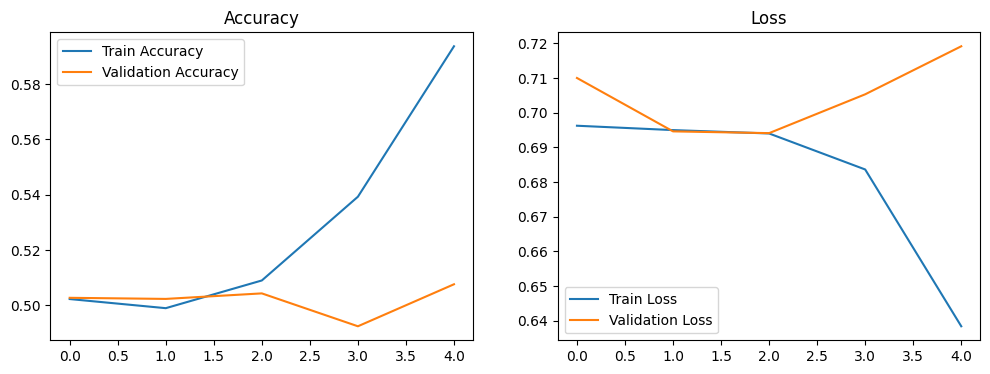

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("IMDB Dataset.csv")

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    df['review'].values, df['sentiment'].values, test_size=0.2, random_state=42)

vocab_size = 10000
max_length = 200
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_padded, train_labels, epochs=5, validation_data=(test_padded, test_labels), batch_size=64)

test_loss, test_acc = model.evaluate(test_padded, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()
